In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("C:\\WEBDEVELOP_0507\\data\\2021~2023_merge_ver3.xlsx")
df

,주택형태,가구원_관계,성별,가구원_연령,가구원_스마트폰이용여부,가구원_인터넷이용여부,가구원_면접가능여부,총가구원수,다문화가족,한부모가족,...,24.영유아 자녀의 스마트폰으로 인한 영향력에 대한 생각,25.영유아 자녀의 스마트폰 바른 사용을 위한 양육 시 가장 어려운 점,교육정도_학교,교육정도_이수여부,맞벌이 여부,도시규모,가중치,연도,고유번호,설문합계
0,2,1,2,33,1,1,1,1,2,1,...,NaN,NaN,5,2.0,NaN,1,1353.2588,2021,1,14
1,2,1,1,40,1,1,1,3,2,2,...,4.0,4.0,5,2.0,NaN,1,1712.4662,2021,2,10
2,2,1,1,59,1,1,1,4,2,2,...,NaN,NaN,5,2.0,NaN,1,1609.1046,2021,3,10
3,2,1,1,49,1,1,1,4,2,2,...,NaN,NaN,5,2.0,NaN,1,1712.4662,2021,4,10
4,2,1,1,55,1,1,1,4,2,2,...,NaN,NaN,5,2.0,NaN,1,1609.1046,2021,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72675,1,1,1,35,1,1,1,3,2,2,...,NaN,NaN,6,2.0,NaN,3,1281.1800,2023,72676,13
72676,1,1,2,44,1,1,1,2,2,2,...,NaN,NaN,5,2.0,NaN,2,2249.4500,2023,72677,20
72677,4,4,2,19,1,1,1,3,2,2,...,NaN,NaN,5,1.0,1.0,2,2444.3800,2023,72678,21
72678,4,2,2,49,1,1,1,3,2,2,...,NaN,NaN,4,2.0,NaN,2,1984.2000,2023,72679,17


In [2]:
df['나이대'] = pd.cut(df['가구원_연령'], bins=[3, 9, 24, 59, float('inf')], labels=['영유아', '청소년', '어른', '노인'])

In [3]:

# '나이대'가 '영유아'인 행만 선택하여 '위험군' 컬럼 추가
df.loc[df['나이대'] == '영유아', '위험군'] = pd.cut(df.loc[df['나이대'] == '영유아', '설문합계'], bins=[-float('inf'), 23, 28, float('inf')], labels=['정상군', '잠재적 위험군', '고위험군'])
df.loc[df['나이대'] == '청소년', '위험군'] = pd.cut(df.loc[df['나이대'] == '청소년', '설문합계'], bins=[-float('inf'), 22, 31, float('inf')], labels=['정상군', '잠재적 위험군', '고위험군'])
df.loc[df['나이대'] == '어른', '위험군'] = pd.cut(df.loc[df['나이대'] == '어른', '설문합계'], bins=[-float('inf'), 23, 29, float('inf')], labels=['정상군', '잠재적 위험군', '고위험군'])
df.loc[df['나이대'] == '노인', '위험군'] = pd.cut(df.loc[df['나이대'] == '노인', '설문합계'], bins=[-float('inf'), 23, 28, float('inf')], labels=['정상군', '잠재적 위험군', '고위험군'])

In [ ]:
col = ['여가시간 주요 활동','성별','가구원_연령']

In [12]:
df_col = df.filter(regex='여가시간 주요 활동')

In [13]:
df_col

,14.여가시간 주요 활동-1순위,14.여가시간 주요 활동-2순위,14.여가시간 주요 활동-3순위
0,6.0,4.0,2.0
1,6.0,4.0,2.0
2,4.0,6.0,2.0
3,4.0,3.0,6.0
4,6.0,2.0,3.0
...,...,...,...
72675,3.0,4.0,6.0
72676,3.0,7.0,6.0
72677,4.0,2.0,6.0
72678,7.0,6.0,4.0


In [6]:
df_col = df_col.iloc[:,0]

In [10]:
df_col = pd.DataFrame(df_col)

In [11]:
df_col.replace({1.0 : '자깆'})

,10.스마트폰 과의존 예방을 위한 대처 방안-1순위
0,1.0
1,3.0
2,2.0
3,1.0
4,1.0
...,...
72675,1.0
72676,3.0
72677,2.0
72678,5.0


In [46]:
age = 34
df_2 = df[(df['가구원_연령'] >= (age-3)) & (df['가구원_연령'] <= (age+3))]
df_2

,성별,가구원_연령,나이대,위험군,설문합계,연도,고유번호
0,2,33,어른,정상군,14,2021,1
6,1,37,어른,정상군,10,2021,7
9,1,36,어른,정상군,10,2021,10
11,1,36,어른,정상군,10,2021,12
13,1,32,어른,정상군,10,2021,14
...,...,...,...,...,...,...,...
72658,2,36,어른,정상군,13,2023,72659
72659,1,37,어른,정상군,12,2023,72660
72661,1,36,어른,정상군,19,2023,72662
72666,1,34,어른,정상군,16,2023,72667


In [47]:
df_2['성별'] = df_2['성별'].replace({1:'남', 2:'여'})

C:\Users\asiae\AppData\Local\Temp\ipykernel_17100\1105251088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['성별'] = df_2['성별'].replace({1:'남', 2:'여'})


In [44]:
df_2

0        여
6        남
9        남
11       남
13       남
        ..
72658    여
72659    남
72661    남
72666    남
72675    남
Name: 성별, Length: 10879, dtype: object

In [50]:
sex='여'
df_2 = df_2[df_2['성별'] == sex]
df_2

,성별,가구원_연령,나이대,위험군,설문합계,연도,고유번호
0,여,33,어른,정상군,14,2021,1
30,여,31,어른,정상군,10,2021,31
48,여,32,어른,정상군,16,2021,49
54,여,32,어른,정상군,10,2021,55
218,여,32,어른,정상군,17,2021,219
...,...,...,...,...,...,...,...
72639,여,31,어른,정상군,18,2023,72640
72645,여,35,어른,정상군,20,2023,72646
72651,여,34,어른,정상군,18,2023,72652
72656,여,35,어른,정상군,16,2023,72657


In [52]:
df_3 = pd.DataFrame(df_2['설문합계'].value_counts())
df_3

,count
설문합계,
20,941
17,844
15,751
18,725
21,724
16,721
23,709
22,652
14,599


In [31]:
df_3.columns

Index(['count'], dtype='object')

([<matplotlib.patches.Wedge at 0x2b70a51afd0>,
 [Text(-0.8070562651346407, 0.7474357396505232, '정상군'),
  Text(0.7109385820129681, -0.8393844962860527, '잠재적 위험군'),
  Text(1.0919576317255402, -0.13277247650153093, '고위험군')],
 [Text(-0.4402125082552585, 0.4076922216275581, '76.2%'),
  Text(0.38778468109798253, -0.4578460888833014, '19.9%'),
  Text(0.5956132536684764, -0.07242135081901686, '3.9%')])

c:\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
c:\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
c:\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  func(*args, **kwargs)
c:\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from current font.
  func(*args, **kwargs)
c:\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51201 (\N{HANGUL SYLLABL

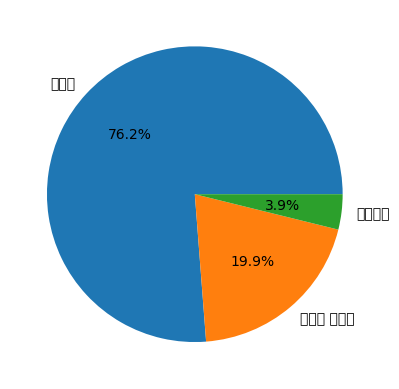

In [32]:

plt.pie(df_3['count'], labels=df_3.index, autopct='%1.1f%%')

In [36]:
df.columns

Index(['주택형태', '가구원_관계', '성별', '가구원_연령', '가구원_스마트폰이용여부', '가구원_인터넷이용여부',
       '가구원_면접가능여부', '총가구원수', '다문화가족', '한부모가족',
       ...
       '교육정도_학교', '교육정도_이수여부', '맞벌이 여부', '도시규모', '가중치', '연도', '고유번호', '설문합계',
       '나이대', '위험군'],
      dtype='object', length=142)

In [37]:
df = df[['성별', '가구원_연령','나이대','위험군','설문합계','연도','고유번호']]

In [51]:
df['설문합계'].value_counts()

설문합계
20    6019
15    5241
17    4893
16    4823
10    4368
14    4215
18    4123
0     4110
13    3648
21    3345
19    3341
24    3302
22    3219
23    2967
26    2755
12    2326
25    2272
28    1877
27    1634
11    1050
30     719
29     630
31     450
32     444
33     332
34     259
35     123
37      89
36      72
38      22
40       9
39       3
Name: count, dtype: int64

In [38]:
df.to_csv('C:\WEBDEVELOP_0507\data\wepdata.csv', encoding='cp949')